# 다중 회귀(Multiple Regression)

* 다중 회귀분석은 다중의 독립변수가 있는 회귀분석을 말한다.
  * 회귀식은 다음과 같다.
    $\hat{Y}=\beta_0+\displaystyle\sum_{i=1}^{n}\beta_{i}x_{i}$
  * $\hat{Y}$ : 예측값
  * $n$ : 독립변수의 수(또는 입력 특성의 개수), $i$번째 특성변수를 $x_i$라 한다.
  * $\beta_i$는 $i$번째 모델 파라미터이다.

* 변수선택법
  * 모델의 적합도를 개선하는 방식으로 전진선택법과 후진선택법 등이 있다.
  * 규제가 있는 다항 회귀 모델
    * 변수선택법의 대안으로 계수추정치들을 제한하거나 규칙화하는 기법으로 $p$개의 독립변수를 모두 포함하는 모델을 적합할 수 있다.
    * 회귀계수들을 0으로 수축하기 위한 방식으로 가장 잘 알려진 것은 릿지(Ridge)와 라쏘(Lasso)이다.
    * 이 두 가지의 절충안으로 엘라스틱넷(Elastic Net)이 있다.

### 릿지(Ridge)
  * 릿지 회귀는 최소제곱 적합식의 수축 패널티라 불리는 항에 L2 패널티를 추가한 것이다.
    * $Ridged MSE(\beta)=MSE(\beta)+\alpha\dfrac{1}{2}\displaystyle\sum_{i=1}^{n}{{\beta}_{i}}^{2}$ (수축 패널티)
      * $\alpha$ : 하이퍼파라미터로, 0이면 릿지 회귀는 선형 회귀와 같아진다.
  * 릿지 회귀에서 $\alpha$가 증가하면 릿지 회귀 적합의 유연성이 줄어들어 편향은 증가하지만 분산은 감소한다.
    * 그러므로 학습데이터의 작은 변화에 회귀계수 추정치가 크게 변하는 문제를 극복할 수 있다.
  * 또한, 릿지는 $2^{p}$개의 모델을 탐색해야 하는 변수선택법에 비해 계산이 빠르다는 장점도 있다.
    * 기존 변수선택법에서는 $p$개의 변수에 대하여 넣을 것인지 뺄 것인지에 따라 $2^{p}$개의 모델이 생성됨

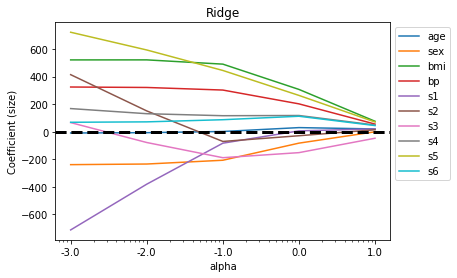

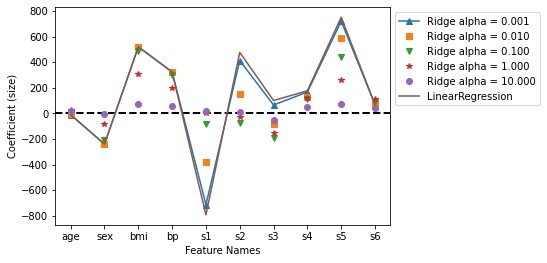

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target

from sklearn.linear_model import Ridge
import numpy as np
alpha = np.logspace(-3, 1, 5) # 10^{-3}부터 10배씩 등비수열 5개항을 뽑아라

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index = alpha)
df_ridge.columns = x.columns
df_ridge

# alpha의 값이 증가함에 따라 회귀계수의 값이 0에 수렴하는지 확인해보기
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.legend(labels = df_ridge.columns, bbox_to_anchor=(1, 1))
plt.show()

# MSE를 사용한 회귀 모델(릿지 회귀에서 alpha가 0인 경우)과 비교해보기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label = 'Ridge alpha = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label = 'Ridge alpha = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label = 'Ridge alpha = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label = 'Ridge alpha = 1.000')
plt.plot(df_ridge.loc[10.000], 'o', label = 'Ridge alpha = 10.000')

plt.plot(lr.coef_, label = 'LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### 라쏘(Lasso)
* RidgeMSE의 수축 패널티 항은 모든 계수를 0으로 수렴시키지만 어떤 것도 0으로 만들지는 않는다.
  * 만약 변수의 크기(p)가 매우 큰 데이터로 릿지 모델을 실행시키면, 결과 해석에 어려움이 발생할 가능성이 있다.
  * 위의 문제점을 해결하기 위해 라쏘 회귀가 사용된다.
* 라쏘 회귀는 최소제곱 적합식의 수축 패널티라 불리는 항에 L1 패널티를 추가한 것이다.
  * $LassoMSE(\beta)=MSE(\beta)+\alpha\displaystyle\sum_{i=1}^{n}|\beta_{i}|$
  * L1 패널티는 하이퍼파라미터 $\alpha$가 충분히 클 때, 계수 추정치들의 일부를 0이 되게 할 수 있다.

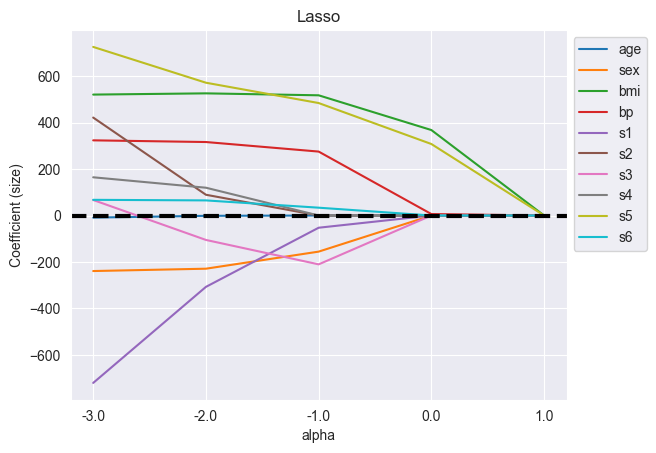

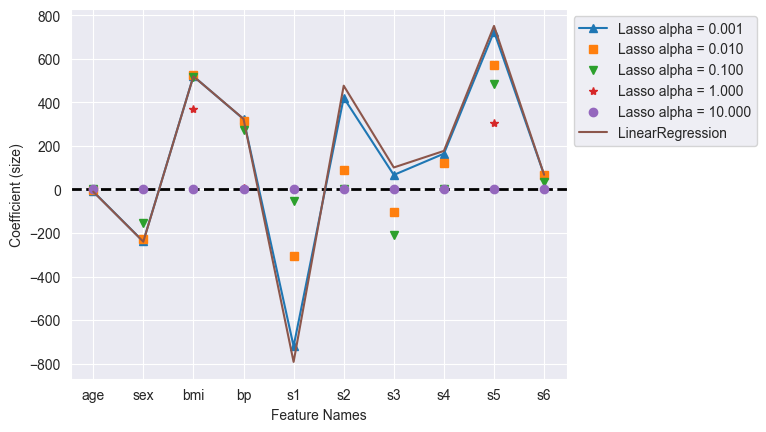

In [20]:
from sklearn.linear_model import Lasso
import numpy as np
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha = a)
    lasso.fit(x, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index = alpha)
df_lasso.columns = x.columns
df_lasso

# alpha의 값이 증가하면서 회귀계수의 값이 0에 수렴하는지 확인해보기
import matplotlib.pyplot as plt
plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels = df_lasso.columns, bbox_to_anchor=(1, 1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle = '--', color = 'black', linewidth = 3)
plt.show()

# MSE를 사용한 회귀 모델(라쏘 회귀에서 alpha가 0인 경우)과 비교해보기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_lasso.loc[0.001], '^-', label = 'Lasso alpha = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label = 'Lasso alpha = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label = 'Lasso alpha = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label = 'Lasso alpha = 1.000')
plt.plot(df_lasso.loc[10.000], 'o', label = 'Lasso alpha = 10.000')

plt.plot(lr.coef_, label = 'LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### 엘라스틱넷(Elastic Net)
* 릿지 회귀와 라쏘 회귀를 절충한 알고리즘으로, 수축 패널티는 릿지화 회귀의 규제항을 단순히 더한 것이며, 혼합비율 $r$을 사용해 조절한다.
  * $ElasticNetMSE(\beta)=MSE(\beta)+r\alpha\displaystyle\sum_{i=1}^{n}|\beta_{i}|+\dfrac{1-r}{2}\alpha\sum_{i=1}^{n}{\beta_
    {i}}^{2}$
  * $r=0$이면 릿지 회귀의 효과를 발휘하고
  * $r=1$이면 라쏘 회귀의 효과를 발휘한다.

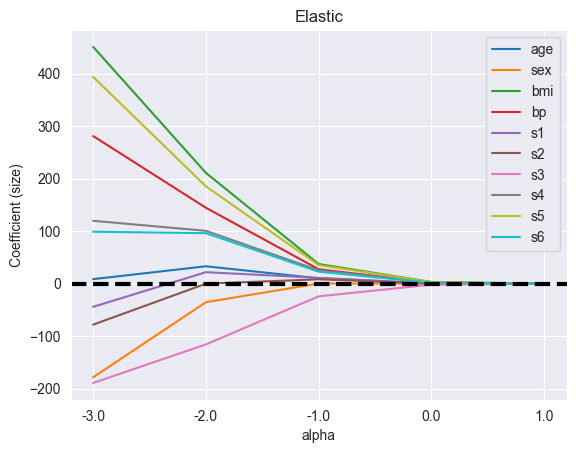

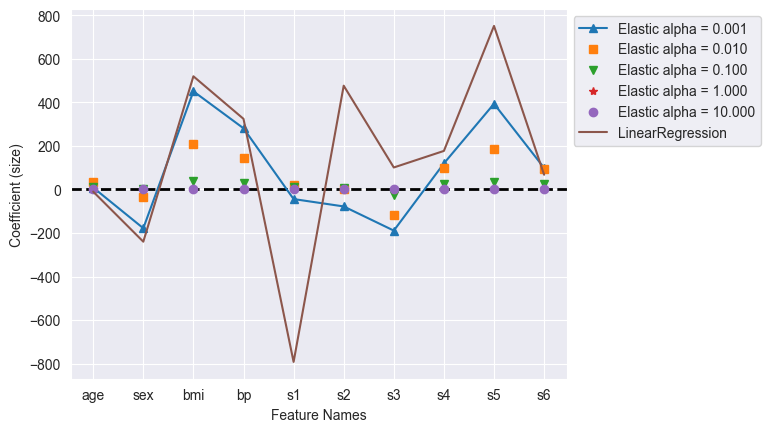

In [25]:
# alpha값을 설정한 뒤 r=0.5로 설정하고 확인해보기
from sklearn.linear_model import ElasticNet
import numpy as np

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha = a, l1_ratio = 0.5) # r(l1_ratio)를 0.5로 설정
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns = x.columns
df_ela

# alpha의 값이 증가함에 따라 회귀계수의 값이 0에 수렴하는지 확인해보기
import matplotlib.pyplot as plt
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels = df_ela.columns, bbox_to_anchor=(1, 1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle = '--', color = 'black', linewidth = 3)
plt.show()

# MSE를 사용한 회귀 모델(라쏘 회귀에서 alpha가 0인 경우)과 비교해보기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label = 'Elastic alpha = 0.001')
plt.plot(df_ela.loc[0.010], 's', label = 'Elastic alpha = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label = 'Elastic alpha = 0.100')
plt.plot(df_ela.loc[1.000], '*', label = 'Elastic alpha = 1.000')
plt.plot(df_ela.loc[10.000], 'o', label = 'Elastic alpha = 10.000')

plt.plot(lr.coef_, label = 'LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()